# quicksort
> quicksort algo implementation

- date: 2018-08-10
- toc: true
- tags: [algorithims]

sort an array by choosing a point in the array, called the pivot point, then creating two smaller arrays:
Keep in mind an array of size one is already sorted, so no need to sort that.

- choose a point, called the pivot point
- make an array containing everything smaller or equal to the pivot
- second array containing everything bigger than the pivot
- so the answer is just quicksort(smaller_array) + pivot + quicksort(bigger_array)

first to generate some random data:

In [2]:
import random
import numpy as np
random_data = [random.randint(0,100) for i in range(10)]
random_data[:10]

[45, 66, 96, 78, 5, 50, 80, 78, 36, 4]

In [8]:
def quicksort(data):
    if len(data) < 2:
        return data
    else:   
        pivot = data[0]
        less = [i for i in data[1:] if i <= pivot]
        more = [i for i in data[1:] if i > pivot]
        return quicksort(less) + [pivot] + quicksort(more)

quicksort(random_data)

[4, 5, 36, 45, 50, 66, 78, 78, 80, 96]

## using a random pivot

Quicksort works faster when using a random pivot

In [4]:
def quicksort2(data):
    import random
    if len(data) < 2:
        return data
    else:
        p_idx = random.randrange(0,len(data)-1)
        pivot = data[p_idx]
        
        less = [i for i in data[:p_idx] if i <= pivot] + [i for i in data[p_idx+1:] if i <= pivot]
        more = [i for i in data[:p_idx] if i > pivot] + [i for i in data[p_idx+1:] if i > pivot]
        return quicksort2(less) + [pivot] + quicksort2(more)

quicksort2(random_data)

[4, 5, 36, 45, 50, 66, 78, 78, 80, 96]

some tests to make sure the algos are working correctly

In [5]:
assert len(random_data) == len(quicksort(random_data))
assert quicksort(random_data) == quicksort2(random_data) == sorted(random_data)

a = [i for i in range(10)]
random.shuffle(a)
assert [i for i in range(10)] == quicksort(a) == quicksort2(a)

In [12]:
%%timeit
quicksort(random_data)

8.86 µs ± 265 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [13]:
%%timeit
quicksort2(random_data)

23.8 µs ± 851 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## visualizing quicksort

there are many better visuals on the web, heres my stab:

I modified the quicksort function above so it only does one sort step and returns the list:

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [15]:
def quicksort_onestep(data):
    import random
    if len(data) < 2:
        return data
    else:
        p_idx = random.randrange(0,len(data)-1)
        pivot = data[p_idx]
        
        less = [i for i in data[:p_idx] if i <= pivot] + [i for i in data[p_idx+1:] if i <= pivot]
        more = [i for i in data[:p_idx] if i > pivot] + [i for i in data[p_idx+1:] if i > pivot]
        return less + [pivot] + more

quicksort_onestep(random_data)

[45, 66, 5, 50, 78, 36, 4, 78, 96, 80]

Here I add the list after each sort step to an array `qs_steps`.

it took 184 steps to sort 100 items


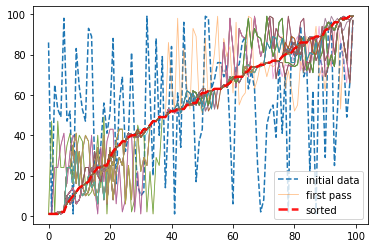

In [16]:
def compare_lists(a, b):
    "returns True if two lists contain the same element at each index, false otherwise"
    assert len(a) == len(b)
    for pair in zip(a, b):
        if pair[0] != pair[1]:
            return False
    return True

random_data = [random.randint(0,100) for i in range(100)]
sorted_data = quicksort2(random_data)
plt.plot(random_data, label="initial data", lw=1.5, ls="dashed")

qs_steps = []

# first quicksort step
d = quicksort_onestep(random_data)
qs_steps.append(d)
plt.plot(d, alpha=0.5, lw=0.8, label="first pass")

#rest of quicksort steps
q_pass = 1
while not (compare_lists(sorted_data, d)):
    q_pass += 1
    d = quicksort_onestep(d)
    qs_steps.append(d)
    if compare_lists(d, sorted_data):
        plt.plot(sorted_data, c="r", ls="dashed", lw=2.5, label="sorted", alpha = 0.9)
    else:
        plt.plot(d, alpha=0.7, lw=0.8)

print(f"it took {len(qs_steps)} steps to sort {len(random_data)} items")
# make plot bigger
plt.legend();

## use animations to visualize quicksort

`qs_steps` is a array containing each step in the quicksort algorithim.

Using [matplotlib.animation](https://matplotlib.org/examples/animation/index.html) to animate this.

Github doesn't render videos for some reason, so see this [notebook at nbviewer](http://nbviewer.jupyter.org/github/khalido/algorithims/blob/master/quicksort.ipynb) for the pretty animations.

In [28]:
# to display animations inline
#%matplotlib nbagg  
import matplotlib.animation as animation
from IPython.display import HTML, display

it took 183 steps to sort 100 items


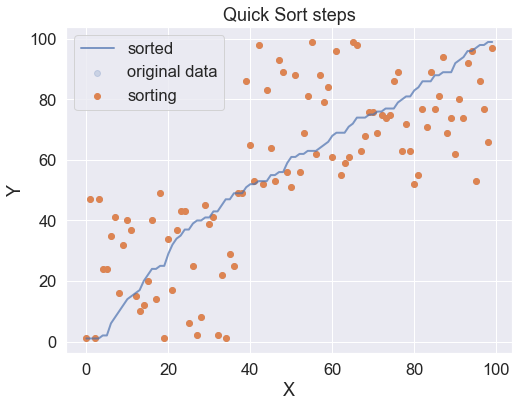

In [39]:
# the data
x = [i for i in range(len(qs_steps[0]))]
y = qs_steps

# the figure
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
ax.set_title("Quick Sort steps")
ax.set_xlabel('X')
ax.set_ylabel('Y')

# this displays the data to be sorted as a scatter plot
original_line = ax.scatter(x,y[0], alpha = 0.2, label = "original data")
# the final sorted line.
sorted_line = ax.plot(x,y[-1], lw=2, alpha = 0.7, label="sorted")

# this displays the data being sorted in a scatter plot
scatterplot = ax.scatter(x,y[0], label="sorting")

def animate(i):
    scatterplot.set_offsets(np.c_[x,y[i]])

ani = animation.FuncAnimation(fig, animate, 
                frames=len(y), interval=150, repeat=False) 

print(f"it took {len(qs_steps)-1} steps to sort {len(qs_steps[0])} items")
plt.legend()
#ani.save("quicksort_animate.mp4")
plt.show();

Another animation, this time using lines instead of a scatter plot.

it took 183 steps to sort 100 items


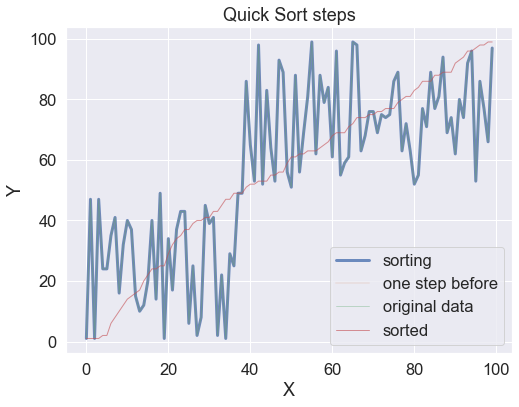

In [49]:
x = [i for i in range(len(qs_steps[0]))]
y = qs_steps

fig1, ax1 = plt.subplots()

# why the heck does line need a comma after it?
line, = ax1.plot(x,y[0], lw=3, alpha=0.8, label="sorting")
line2, = ax1.plot(x,y[0], lw=2, alpha = 0.1, label = "one step before")
line3 = ax1.plot(x,y[0], lw=0.8, alpha = 0.4, label = "original data")
line3 = ax1.plot(x,y[-1], lw=1, alpha = 0.6, label="sorted")

fig1.set_size_inches(8,6)
ax1.set_title("Quick Sort steps")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')

def animate(i):
    line.set_ydata(y[i])  # update the data
    if i > 1:
        line2.set_ydata(y[i-1])

ani2 = animation.FuncAnimation(fig1, animate, 
                frames=len(y), interval=120, repeat=False) 

print(f"it took {len(qs_steps)-1} steps to sort {len(qs_steps[0])} items")
plt.legend();
#ani2.save("quicksort_animate1.mp4")